## <font color=brown>Problem Statement</font>
Create a model for Land Use Classification and then test your model real world data. Specifically, you will train a supervised classification model, apply the model on test data, and finally visualize your predicted labels onto a TIF file.

### <font color=brown>Understanding Data</font>

In [6488]:
# Supress unneccessary warnings 

import warnings 
warnings.filterwarnings('ignore') 

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6489]:
# Read the dataset and set max columns to be displayed to 50
ndvi = pd.read_csv('/Users/shweta/Downloads/CropIn - DS Challenge/Training_Data.csv')
pd.set_option("display.max_columns", 50)
ndvi.head(50)

,Unnamed: 0,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban
5,5,Urban_17,P_524,0.099241,0.079493,0.075612,0.054829,0.059697,0.096237,0.105772,0.084987,0.154530,0.105469,Urban
6,6,Forest_5,P_577,0.735157,0.262940,0.543253,0.579879,0.388228,0.368677,0.460185,0.463968,0.429538,0.435294,Forest
7,7,Forest_6,P_1995,0.733333,0.229512,0.548218,0.592695,0.302785,0.423717,0.488333,0.506173,0.437179,0.357168,Forest
8,8,Forest_15,P_196,0.724426,0.322379,0.594387,0.446874,0.325843,0.400850,0.500879,0.444395,0.330858,0.322870,Forest
9,9,Forest_27,P_1969,NaN,NaN,NaN,0.435872,NaN,NaN,0.554936,NaN,NaN,NaN,Forest


In [6490]:
ndvi.shape

(17833, 14)

In [6491]:
ndvi.drop('Unnamed: 0', axis=1, inplace = True)

In [6492]:
ndvi.shape

(17833, 13)

In [6493]:
ndvi.head()

,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban


In [6494]:
ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17833 entries, 0 to 17832
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FarmerCropId  17833 non-null  object 
 1   pixel         17833 non-null  object 
 2   0             17510 non-null  float64
 3   20            17510 non-null  float64
 4   40            17510 non-null  float64
 5   60            17494 non-null  float64
 6   80            17478 non-null  float64
 7   100           17510 non-null  float64
 8   120           17494 non-null  float64
 9   140           17510 non-null  float64
 10  160           17510 non-null  float64
 11  180           17501 non-null  float64
 12  Class         17833 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


In [6495]:
# Checking percentage of missing values in each column 
round(100*(ndvi.isnull().sum()/len(ndvi.index)), 2)

FarmerCropId    0.00
pixel           0.00
0               1.81
20              1.81
40              1.81
60              1.90
80              1.99
100             1.81
120             1.90
140             1.81
160             1.81
180             1.86
Class           0.00
dtype: float64

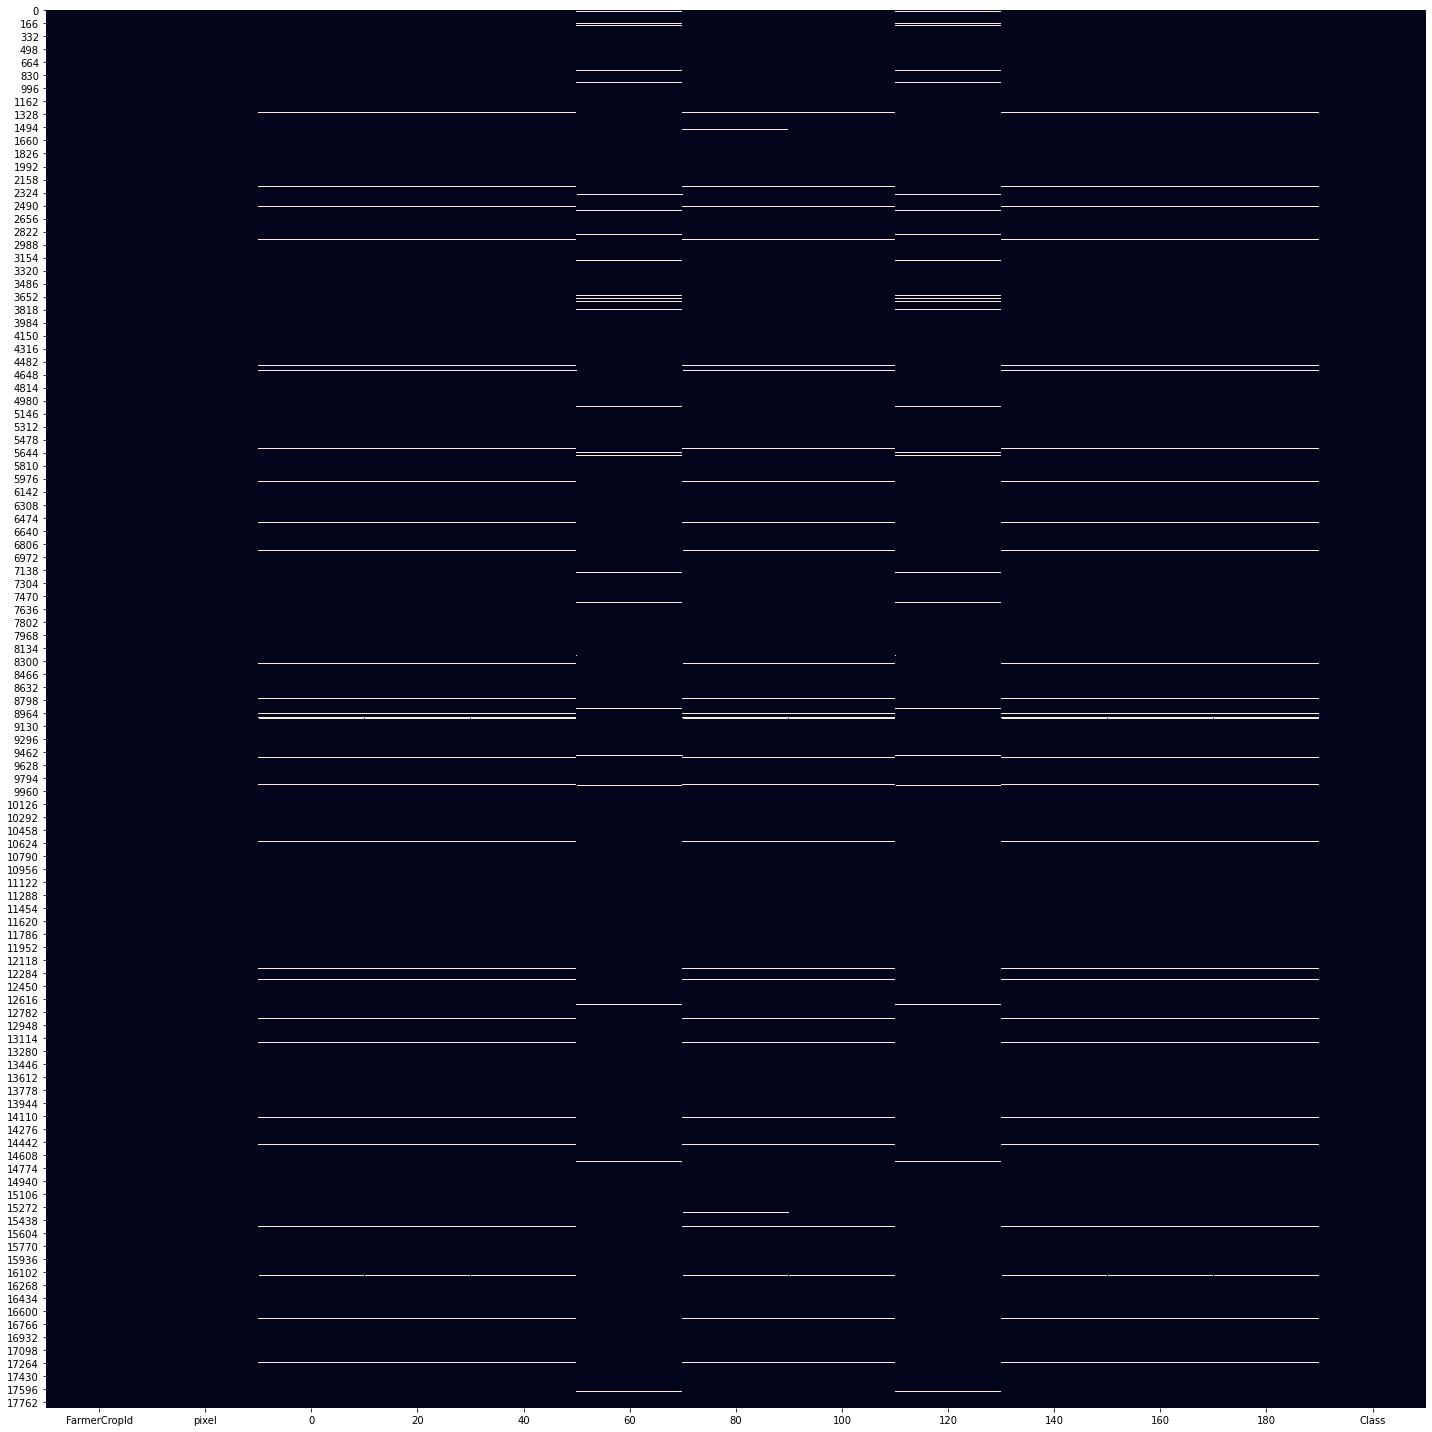

In [6496]:
# Checking null values using heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(ndvi.isnull(), cbar=False)
plt.tight_layout()
plt.show()

### <font color=brown>Data Cleaning</font>

In [6497]:
# Checking total number of rows with  missing values.
sum([True for idx,row in ndvi.iterrows() if any(row.isnull())])

703

In [6498]:
# Dropping the rows with missing values as these ndvi values cannot be predicted. 
#703 records have missing values out of 17833 records. Lets drop these records.
ndvi = ndvi.dropna()

In [6499]:
ndvi

,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Urban_23,P_2689,0.087074,0.041958,0.019823,0.058190,0.010562,0.022649,0.073394,0.097718,0.126589,0.095582,Urban
17829,Forest_18,P_2509,0.595765,0.331671,0.555631,0.507329,0.370455,0.368216,0.393681,0.308381,0.289483,0.306276,Forest
17830,Forest_21,P_1131,0.650738,0.327742,0.490814,0.493418,0.396516,0.377067,0.393113,0.464577,0.318141,0.325891,Forest
17831,Urban_0,P_4970,0.050313,0.039379,0.076356,0.058757,0.077863,0.079686,0.066632,0.078063,0.106880,0.058886,Urban


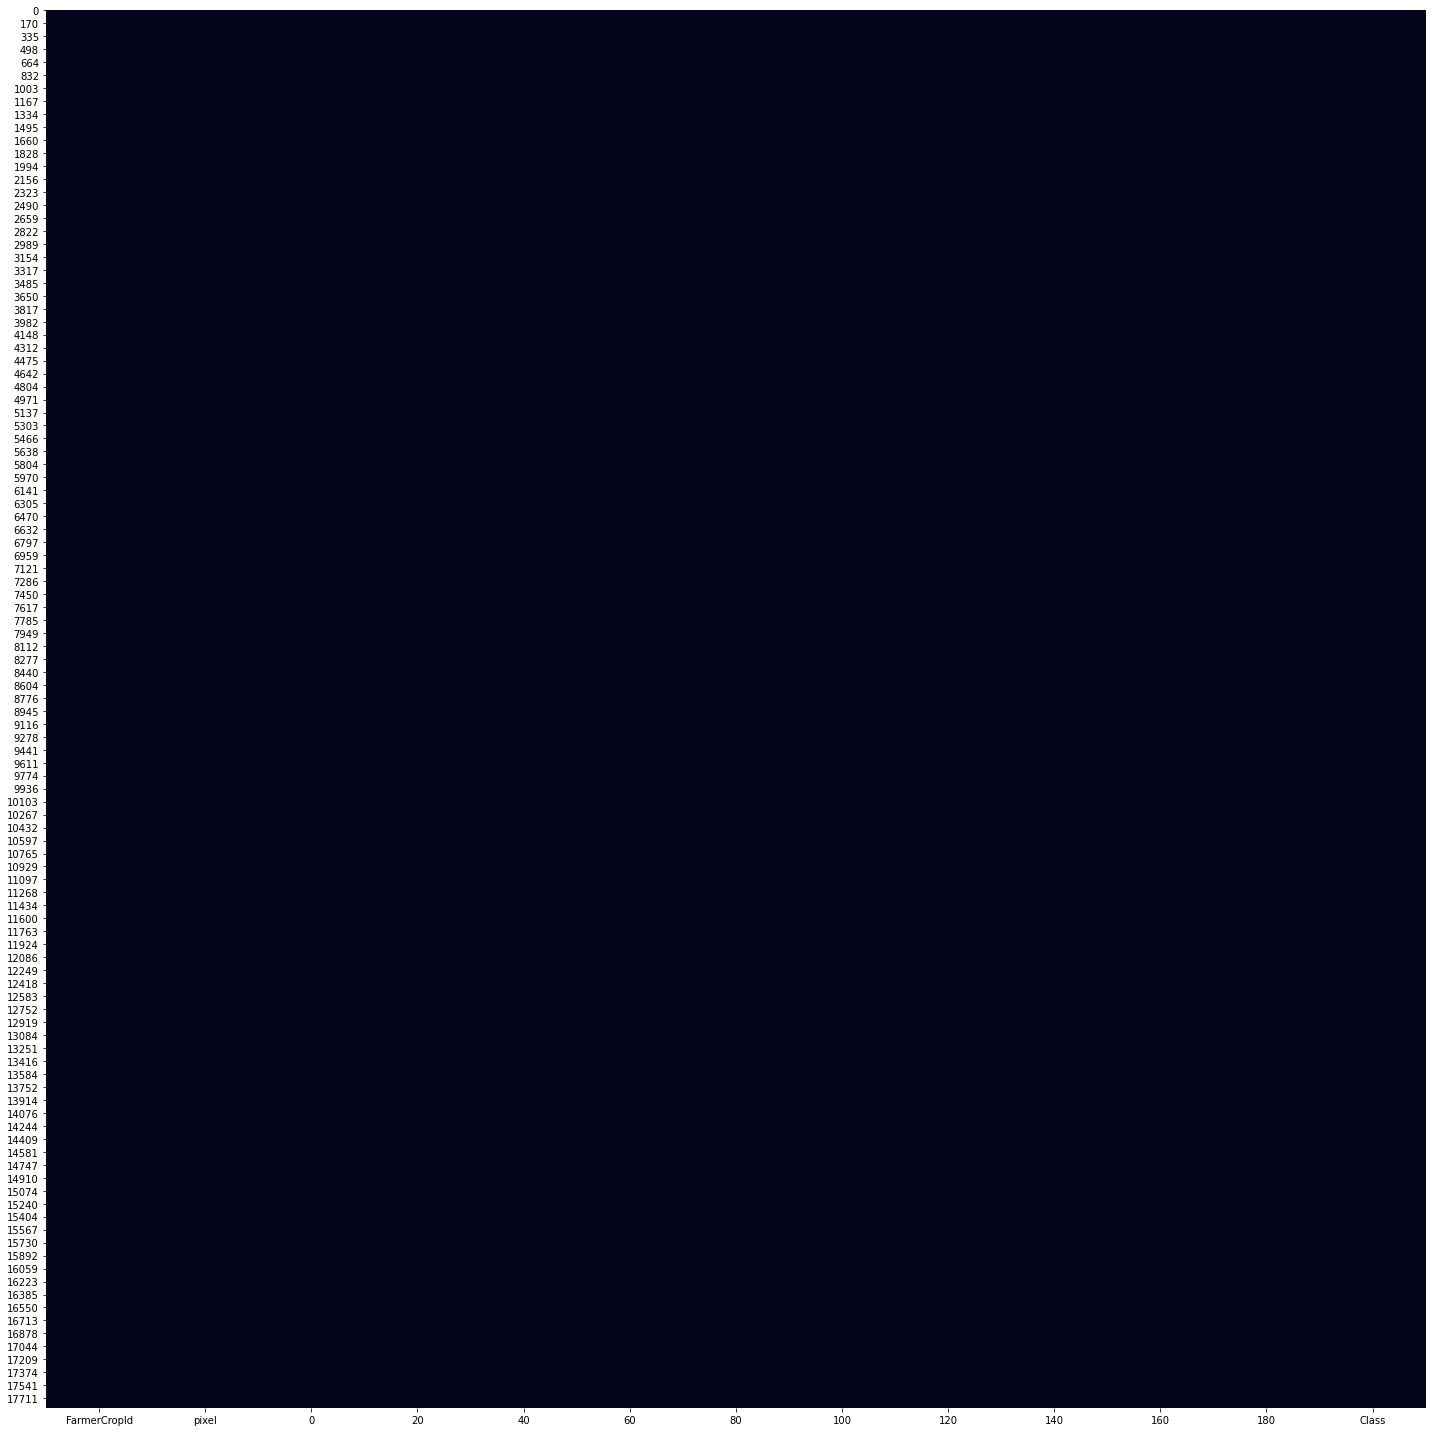

In [6500]:
# Checking null values using heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(ndvi.isnull(), cbar=False)
plt.tight_layout()
plt.show()

In [6501]:
ndvi.columns

Index(['FarmerCropId', 'pixel', '0', '20', '40', '60', '80', '100', '120',
       '140', '160', '180', 'Class'],
      dtype='object')

In [6502]:
# Checking categories present in categorical columns 
ndvi.FarmerCropId.value_counts()

Forest_8     1205
Urban_22      762
Urban_0       756
Forest_4      713
Urban_21      599
             ... 
Barren_15       3
Barren_16       3
Barren_1        2
Barren_29       2
Barren_26       1
Name: FarmerCropId, Length: 105, dtype: int64

In [6503]:
ndvi.pixel.value_counts()

P_912     17
P_207     17
P_656     16
P_303     15
P_652     15
          ..
P_4404     1
P_3288     1
P_4383     1
P_2926     1
P_3111     1
Name: pixel, Length: 4023, dtype: int64

In [6504]:
ndvi.Class.value_counts()

Forest    9270
Urban     7194
Water      515
Barren     151
Name: Class, dtype: int64

In [6505]:
ndvi

,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Urban_23,P_2689,0.087074,0.041958,0.019823,0.058190,0.010562,0.022649,0.073394,0.097718,0.126589,0.095582,Urban
17829,Forest_18,P_2509,0.595765,0.331671,0.555631,0.507329,0.370455,0.368216,0.393681,0.308381,0.289483,0.306276,Forest
17830,Forest_21,P_1131,0.650738,0.327742,0.490814,0.493418,0.396516,0.377067,0.393113,0.464577,0.318141,0.325891,Forest
17831,Urban_0,P_4970,0.050313,0.039379,0.076356,0.058757,0.077863,0.079686,0.066632,0.078063,0.106880,0.058886,Urban


In [6506]:
# Dropping duplicate records if any.
ndvi.drop_duplicates()

,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Urban_23,P_2689,0.087074,0.041958,0.019823,0.058190,0.010562,0.022649,0.073394,0.097718,0.126589,0.095582,Urban
17829,Forest_18,P_2509,0.595765,0.331671,0.555631,0.507329,0.370455,0.368216,0.393681,0.308381,0.289483,0.306276,Forest
17830,Forest_21,P_1131,0.650738,0.327742,0.490814,0.493418,0.396516,0.377067,0.393113,0.464577,0.318141,0.325891,Forest
17831,Urban_0,P_4970,0.050313,0.039379,0.076356,0.058757,0.077863,0.079686,0.066632,0.078063,0.106880,0.058886,Urban


### <font color=brown>Data Visualization </font>

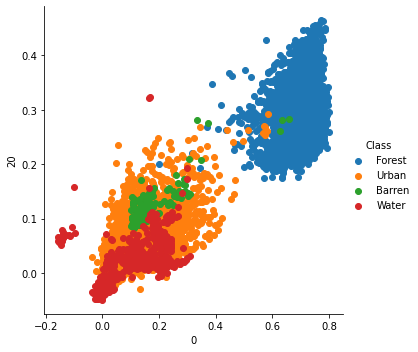

In [6507]:
# Comparing column '0' and '20' as per class column categories
sns.FacetGrid(ndvi,hue='Class',size=5).map(plt.scatter,'0','20').add_legend()
plt.show()

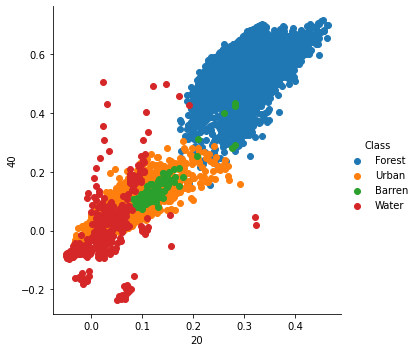

In [6508]:
# Comparing column '20' and '40' as per class column categories
sns.FacetGrid(ndvi,hue='Class',size=5).map(plt.scatter,'20','40').add_legend()
plt.show()

In [6509]:
features = ['0','20','40','60','80','100','120','140','160','180']

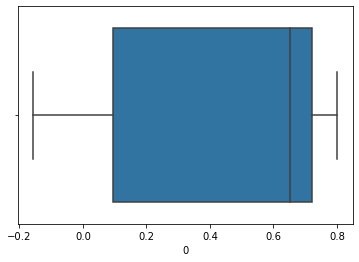

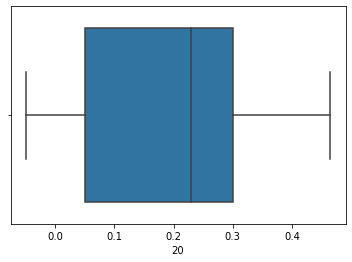

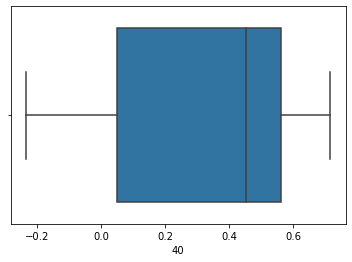

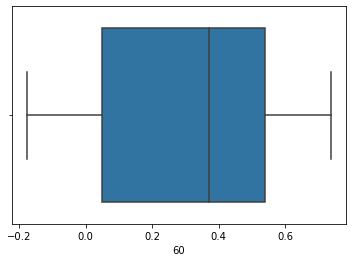

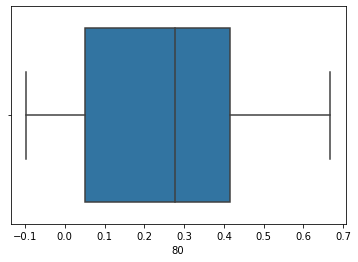

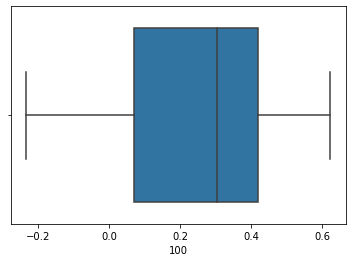

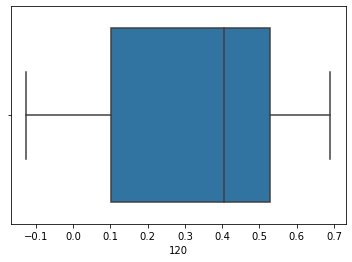

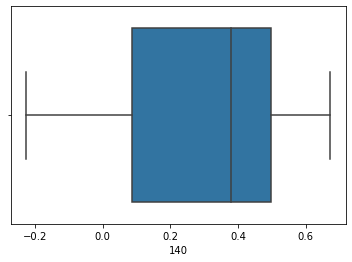

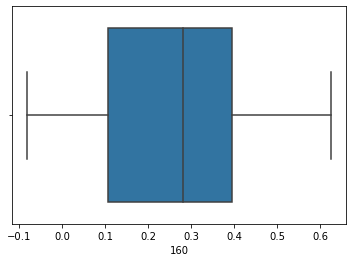

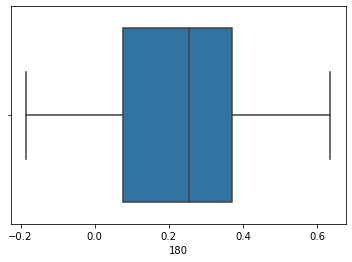

In [6510]:
# Checking for Outliers 
for col in features:
    sns.boxplot(ndvi[col])
    plt.show()

No Outlier present.

### <font color=brown>Data Transformation </font>

In [6511]:
ndvi

,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Urban_23,P_2689,0.087074,0.041958,0.019823,0.058190,0.010562,0.022649,0.073394,0.097718,0.126589,0.095582,Urban
17829,Forest_18,P_2509,0.595765,0.331671,0.555631,0.507329,0.370455,0.368216,0.393681,0.308381,0.289483,0.306276,Forest
17830,Forest_21,P_1131,0.650738,0.327742,0.490814,0.493418,0.396516,0.377067,0.393113,0.464577,0.318141,0.325891,Forest
17831,Urban_0,P_4970,0.050313,0.039379,0.076356,0.058757,0.077863,0.079686,0.066632,0.078063,0.106880,0.058886,Urban


In [6512]:
# Dropping columns 'FarmerCropId' and 'pixel' as they wont assist in modelling.
df = ndvi[['0','20','40','60','80','100','120','140','160','180','Class']]

In [6513]:
# Imputing categories with numbers.
cls = {'Forest':1,'Water':2, 'Urban':3,'Barren':4}

In [6514]:
df.Class = [cls[item] for item in df.Class]

In [6515]:
df.head()

,0,20,40,60,80,100,120,140,160,180,Class
0,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,1
1,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,1
2,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,3
3,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,1
4,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,3


In [6516]:
df.Class.value_counts()

1    9270
3    7194
2     515
4     151
Name: Class, dtype: int64

There is Class Imbalance which needs to be tackled during Modelling.

### <font color=brown>Data Modelling </font>

In [6517]:
# Creating a copy of df and storing it in rfm for modelling using Random Forest Classifier.
rfm = df.copy()

In [6518]:
rfm.head()

,0,20,40,60,80,100,120,140,160,180,Class
0,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,1
1,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,1
2,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,3
3,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,1
4,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,3


In [6519]:
rfm.shape

(17130, 11)

#### Creating X and y variables 

In [6520]:
X = rfm.drop(['Class'],axis=1)
y = rfm['Class']

#### Train-Test Split

In [6521]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42)

In [6522]:
print(X_train.shape)
print(X_test.shape)

(11991, 10)
(5139, 10)


#### Data Balancing using SMOTE technique 

In [6523]:
from imblearn.over_sampling import SMOTE 

In [6524]:
smote = SMOTE()

In [6525]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [6526]:
from collections import Counter

In [6527]:
print ("Before Smote:", Counter(y_train))
print ("After Smote:", Counter(y_train_smote))

Before Smote: Counter({1: 6538, 3: 4995, 2: 354, 4: 104})
After Smote: Counter({1: 6538, 3: 6538, 2: 6538, 4: 6538})


#### Data Modelling using Random Forest Classifier 

In [6528]:
from sklearn.ensemble import RandomForestClassifier

In [6529]:
# Create Class instance 
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)

In [6530]:
# Fit the class instance on Training data 
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [6531]:
rf.oob_score_

0.9146527990211074

#### Hyperparameter Tuning 

In [6532]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [6533]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [6534]:
from sklearn.model_selection import GridSearchCV

In [6535]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [6536]:
# Performing hyperparameter tuning using GridSearch CV 
grid_search.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [6537]:
grid_search.best_score_

0.9970174365249312

In [6538]:
# Finding best estimator 
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [6539]:
rf = rf_best

In [6540]:
# Fitting the model with best estimator 
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

#### Making Predictions and Classification Report

In [6541]:
# Making predictions on Test set 
y_test_pred = rf.predict(X_test)

In [6542]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2732
           2       0.96      0.98      0.97       161
           3       0.99      0.99      0.99      2199
           4       0.64      0.74      0.69        47

    accuracy                           0.99      5139
   macro avg       0.90      0.93      0.91      5139
weighted avg       0.99      0.99      0.99      5139



Observations:
Recall for Forest, Water and Urban category is good where as for Barren category it is decent.

In [6543]:
# Overall accuracy of the model 
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_test_pred))

ACCURACY OF THE MODEL:  0.9916326133489005


In [6544]:
Predictions = pd.DataFrame(y_test_pred)

In [6545]:
# Predicted values dataframe
Predictions

,0
0,1
1,1
2,3
3,1
4,1
...,...
5134,3
5135,1
5136,1
5137,1


### <font color=brown>Preparing Test Data </font>

####  Reading Images as array and converting them to DataFrame.

#### Reading 0.tif

In [6546]:
from PIL import Image
im0 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/0.tif')
#im0.show()

In [6547]:
imarray0 = np.array(im0)

In [6548]:
imarray0

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [6549]:
df0 = imarray0.ravel()

In [6550]:
zero = pd.DataFrame(df0)

In [6551]:
zero.shape

(1794924, 1)

In [6552]:
zero.isnull().sum()

0    897553
dtype: int64

#### Reading 20.tif

In [6553]:
from PIL import Image
im20 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/20.tif')
#im20.show()

In [6554]:
imarray20 = np.array(im20)

In [6555]:
imarray20

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [6556]:
df20 = imarray20.ravel()

In [6557]:
twe = pd.DataFrame(df20)

In [6558]:
twe.shape

(1794924, 1)

In [6559]:
twe.isnull().sum()

0    897553
dtype: int64

#### Reading 40.tif

In [6560]:
from PIL import Image
im40 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/40.tif')

In [6561]:
imarray40 = np.array(im40)

In [6562]:
df40 = imarray40.ravel()

In [6563]:
fort = pd.DataFrame(df40)

In [6564]:
fort.shape

(1794924, 1)

#### Reading 60.tif

In [6565]:
from PIL import Image
im60 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/60.tif')

In [6566]:
imarray60 = np.array(im60)

In [6567]:
df60 = imarray60.ravel()

In [6568]:
sixty = pd.DataFrame(df60)

#### Reading 80.tif

In [6569]:
from PIL import Image
im80 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/80.tif')

In [6570]:
imarray80 = np.array(im80)
df80 = imarray80.ravel()
eighty = pd.DataFrame(df80)

#### Reading 100.tif

In [6571]:
from PIL import Image
im100 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/100.tif')

In [6572]:
imarray100 = np.array(im100)
df100 = imarray100.ravel()
hun = pd.DataFrame(df100)

#### Reading 120.tif

In [6573]:
from PIL import Image
im120 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/120.tif')

In [6574]:
imarray120 = np.array(im120)
df120 = imarray120.ravel()
onetwenty = pd.DataFrame(df120)

#### Reading 140.tif

In [6575]:
from PIL import Image
im140 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/140.tif')

In [6576]:
imarray140 = np.array(im140)
df140 = imarray140.ravel()
oneforty = pd.DataFrame(df140)

#### Reading 160.tif

In [6577]:
from PIL import Image
im160 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/160.tif')

In [6578]:
imarray160 = np.array(im160)
df160 = imarray160.ravel()
onesixty = pd.DataFrame(df160)

#### Reading 180.tif

In [6579]:
from PIL import Image
im180 = Image.open('/Users/shweta/Downloads/CropIn - DS Challenge/180.tif')

In [6580]:
imarray180 = np.array(im180)
df180 = imarray180.ravel()
oneighty = pd.DataFrame(df180)

#### Combining all DataFrame to form a single DataFrame 

In [6581]:
result = pd.concat([zero, twe, fort, sixty, eighty, hun, onetwenty, oneforty, onesixty, oneighty ], axis=1, join="inner")

In [6582]:
result

,0,0,0,0,0,0,0,0,0,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1794919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6583]:
# Drop Null values to reduce the Dimension  
res = result.dropna()

In [6584]:
res

,0,0,0,0,0,0,0,0,0,0
539,0.329490,0.353315,0.258779,0.342197,0.399738,0.222735,0.473115,0.501271,0.392103,0.384102
540,0.354627,0.278580,0.290514,0.345183,0.323568,0.235906,0.477826,0.507898,0.513125,0.420290
1904,0.301011,0.265335,0.232849,0.487637,0.466070,0.244964,0.683130,0.694568,0.552731,0.468364
1905,0.310408,0.334209,0.309813,0.345968,0.374498,0.234447,0.483351,0.528928,0.421143,0.378261
1906,0.411095,0.377117,0.302578,0.321477,0.315098,0.236452,0.514286,0.498550,0.521564,0.420126
...,...,...,...,...,...,...,...,...,...,...
1793172,0.223485,0.109357,0.283028,0.481620,0.599477,0.671628,0.751582,0.730809,0.521186,0.401535
1794513,0.479801,0.260030,0.163391,0.243329,0.346339,0.584515,0.678032,0.727370,0.602761,0.552228
1794514,0.442017,0.237519,0.173779,0.233073,0.320991,0.573305,0.638897,0.700443,0.593189,0.534609
1794515,0.478238,0.303480,0.202563,0.256774,0.320359,0.508412,0.561707,0.624297,0.540819,0.520509


In [6585]:
# Creating a copy of DataFrame to test 
test = res.copy()

In [6586]:
# Renaming columns 
col = ['0','20','40','60','80','100','120','140','160','180']

In [6587]:
test.columns = col

In [6588]:
test

,0,20,40,60,80,100,120,140,160,180
539,0.329490,0.353315,0.258779,0.342197,0.399738,0.222735,0.473115,0.501271,0.392103,0.384102
540,0.354627,0.278580,0.290514,0.345183,0.323568,0.235906,0.477826,0.507898,0.513125,0.420290
1904,0.301011,0.265335,0.232849,0.487637,0.466070,0.244964,0.683130,0.694568,0.552731,0.468364
1905,0.310408,0.334209,0.309813,0.345968,0.374498,0.234447,0.483351,0.528928,0.421143,0.378261
1906,0.411095,0.377117,0.302578,0.321477,0.315098,0.236452,0.514286,0.498550,0.521564,0.420126
...,...,...,...,...,...,...,...,...,...,...
1793172,0.223485,0.109357,0.283028,0.481620,0.599477,0.671628,0.751582,0.730809,0.521186,0.401535
1794513,0.479801,0.260030,0.163391,0.243329,0.346339,0.584515,0.678032,0.727370,0.602761,0.552228
1794514,0.442017,0.237519,0.173779,0.233073,0.320991,0.573305,0.638897,0.700443,0.593189,0.534609
1794515,0.478238,0.303480,0.202563,0.256774,0.320359,0.508412,0.561707,0.624297,0.540819,0.520509


In [6589]:
# Storing test DataFrame in csv for reference
test.to_csv (r'/Users/shweta/Downloads/CropIn - DS Challenge/test.csv', header=True)

### <font color=brown>Making Predictions on Test set </font>

In [6590]:
# Making Predictions on Test data 
test_pred = rf.predict(test)

In [6591]:
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [6592]:
# Converting array to DataFrame
a = pd.DataFrame(test_pred)

In [6593]:
# Renaming column 
a.columns = ['pred']

In [6594]:
a

,pred
0,1
1,1
2,1
3,1
4,1
...,...
897366,2
897367,1
897368,1
897369,1


In [6595]:
a.pred.value_counts()

1    646484
2    134522
3    103521
4     12844
Name: pred, dtype: int64

In [6596]:
# Creating copy of predictions 
b = a.copy()

In [6597]:
# Matching index of test dataframe and predictions dataframe 
b.index = test.index

In [6598]:
b.head()

,pred
539,1
540,1
1904,1
1905,1
1906,1


In [6599]:
b.shape

(897371, 1)

In [6600]:
# Adding index column to twe DataFrame 
twe['idx'] = twe.index

In [6601]:
twe

,0,idx
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4
...,...,...
1794919,NaN,1794919
1794920,NaN,1794920
1794921,NaN,1794921
1794922,NaN,1794922


In [6602]:
b.index

Int64Index([    539,     540,    1904,    1905,    1906,    1907,    1908,
               1909,    3270,    3271,
            ...
            1793167, 1793168, 1793169, 1793170, 1793171, 1793172, 1794513,
            1794514, 1794515, 1794516],
           dtype='int64', length=897371)

In [6603]:
# Checking DataFrame for the presence of values
new_df = pd.concat([twe, b], axis=1)
new_df[530:550]

,0,idx,pred
530,NaN,530,NaN
531,NaN,531,NaN
532,NaN,532,NaN
533,NaN,533,NaN
534,NaN,534,NaN
535,NaN,535,NaN
536,NaN,536,NaN
537,NaN,537,NaN
538,NaN,538,NaN
539,0.353315,539,1.0


In [6604]:
# Considering only Predictions columns 
final = new_df['pred']

In [6605]:
final

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1794919   NaN
1794920   NaN
1794921   NaN
1794922   NaN
1794923   NaN
Name: pred, Length: 1794924, dtype: float64

### <font color=brown>Creating Image from Prediction array</font> 

In [6606]:
import numpy as np
from PIL import Image as im

In [6607]:
# Creating copy of DataFrame
clr = new_df.copy()

In [6608]:
clr

,0,idx,pred
0,NaN,0,NaN
1,NaN,1,NaN
2,NaN,2,NaN
3,NaN,3,NaN
4,NaN,4,NaN
...,...,...,...
1794919,NaN,1794919,NaN
1794920,NaN,1794920,NaN
1794921,NaN,1794921,NaN
1794922,NaN,1794922,NaN


In [6609]:
clr.pred.value_counts()

1.0    646484
2.0    134522
3.0    103521
4.0     12844
Name: pred, dtype: int64

In [6610]:
# Imputing null values with 0
clr['pred'] = clr['pred'].fillna(0.0)

In [6611]:
# Checking count of categories 
clr.pred.value_counts()

0.0    897553
1.0    646484
2.0    134522
3.0    103521
4.0     12844
Name: pred, dtype: int64

In [6612]:
clr['pred']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1794919    0.0
1794920    0.0
1794921    0.0
1794922    0.0
1794923    0.0
Name: pred, Length: 1794924, dtype: float64

In [6613]:
# Converting the column type to 'int'
clr['pred'] = clr['pred'].astype(int)

In [6614]:
clr

,0,idx,pred
0,NaN,0,0
1,NaN,1,0
2,NaN,2,0
3,NaN,3,0
4,NaN,4,0
...,...,...,...
1794919,NaN,1794919,0
1794920,NaN,1794920,0
1794921,NaN,1794921,0
1794922,NaN,1794922,0


In [6615]:
# Converting DataFrame to array 
arr = clr['pred'].to_numpy()

In [6616]:
# Reshaped array 
re_arr = arr.reshape(1314, 1366)

In [6617]:
# Creating array to plot the image
x = np.arange(0,1366)
y = np.arange(1313,-1,-1)

In [6618]:
x

array([   0,    1,    2, ..., 1363, 1364, 1365])

In [6619]:
X,Y = np.meshgrid(x,y)

In [6620]:
X

array([[   0,    1,    2, ..., 1363, 1364, 1365],
       [   0,    1,    2, ..., 1363, 1364, 1365],
       [   0,    1,    2, ..., 1363, 1364, 1365],
       ...,
       [   0,    1,    2, ..., 1363, 1364, 1365],
       [   0,    1,    2, ..., 1363, 1364, 1365],
       [   0,    1,    2, ..., 1363, 1364, 1365]])

In [6621]:
# Checking type of array 
type(re_arr[0,0])

numpy.int64

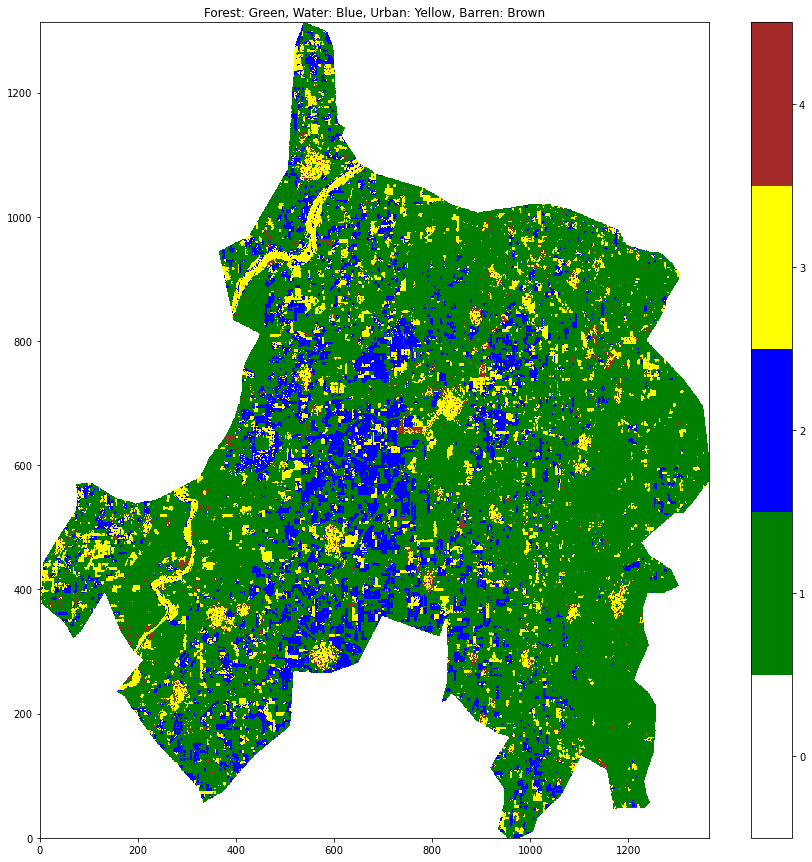

In [6622]:
# Plotting all points on map category wise.
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('cmap_try',['white','green','blue','yellow','brown'],N=5)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
ax.set_title('Forest: Green, Water: Blue, Urban: Yellow, Barren: Brown')
plt.pcolormesh(X,Y,re_arr,cmap = cmap, vmin=-0.5, vmax=4.5)
plt.colorbar()

